<a href="https://colab.research.google.com/github/lsloan/image-scroller/blob/master/Animated_GIF_scrolling_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image to Scrolling GIF

Given a static image ("`input.png`"), make an animated GIF ("`output.gif`") that contains the static image endlessly scrolling to the left, with wraparound.



## Example Images

|input.png|output.gif|
|---|---|
|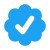|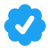
|

## Code

In [ ]:
# Google Colab has Pillow v7.x installed; install v8.x or newer
%pip install Pillow -U


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image, ImageChops

# resizeDimensions = (640, 360) # `(width, height)` or `None`
resizeDimensions = None
frameCount: int = 128
frameDuration: int = 100
optimize: bool = False

In [ ]:
frames = [Image.open('input.png')]

if resizeDimensions:
    frames[0] = frames[0].resize(resizeDimensions)

# TODO: make scrollable in any direction using X-Y vectors.
# See: Information about `ImageChops.offset`…
# http://www.legendu.net/misc/blog/python-pillow-image-shift/#ImageChops.offset
# https://pillow.readthedocs.io/en/stable/reference/ImageChops.html#PIL.ImageChops.offset

(width, height) = frames[0].size
leftWidth = width // frameCount
rightWidth = width - leftWidth

for _ in range(frameCount - 1):
    newFrame = frames[-1].copy()
    leftRegion = newFrame.crop((0, 0, leftWidth, height))
    rightRegion = newFrame.crop((leftWidth, 0, width, height))
    newFrame.paste(rightRegion, (0, 0, rightWidth, height))
    newFrame.paste(leftRegion, (rightWidth, 0, width, height))
    frames.append(newFrame)

frames[0].save('output.gif',
               save_all=True, append_images=frames[1:], loop=0, 
               optimize=optimize, duration=frameDuration)

## Useful Resources

* https://note.nkmk.me/en/python-pillow-gif/
* https://www.geeksforgeeks.org/python-pil-image-resize-method/
* https://www.kite.com/python/examples/3039/pil-copy-a-region-of-an-image-to-another-area
* https://ezgif.com/ – Optimize GIF and convert to video
